In [47]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
df = yf.download('MSFT', start='2023-1-1')

[*********************100%***********************]  1 of 1 completed


In [12]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,243.080002,245.750000,237.399994,239.580002,238.460144,25740000
2023-01-04,232.279999,232.869995,225.960007,229.100006,228.029129,50623400
2023-01-05,227.199997,227.550003,221.759995,222.309998,221.270844,39585600
2023-01-06,223.000000,225.759995,219.350006,224.929993,223.878601,43613600
2023-01-09,226.449997,231.240005,226.410004,227.119995,226.058380,27369800


In [16]:
def MACD(df):
    df['EMA12'] = df.Close.ewm(span=12).mean()# if you want to be 100% mathematically correct you can use argument adjusted=True inside ewm
    df['EMA26'] = df.Close.ewm(span=26).mean()
    df['MACD'] = df.EMA12 - df.EMA26
    df['signal'] = df.MACD.ewm(span=9).mean()
    print('Indicators Added!')

In [17]:
MACD(df)

Indicators Added!


In [18]:
df

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,signal
Date,,,,,,,,,,
2023-01-03,243.080002,245.750000,237.399994,239.580002,238.460144,25740000,239.580002,239.580002,0.000000,0.000000
2023-01-04,232.279999,232.869995,225.960007,229.100006,228.029129,50623400,233.903337,234.138466,-0.235128,-0.130627
2023-01-05,227.199997,227.550003,221.759995,222.309998,221.270844,39585600,229.378454,229.888612,-0.510158,-0.286172
2023-01-06,223.000000,225.759995,219.350006,224.929993,223.878601,43613600,227.974249,228.502399,-0.528150,-0.368143
2023-01-09,226.449997,231.240005,226.410004,227.119995,226.058380,27369800,227.742151,228.181814,-0.439662,-0.389418
...,...,...,...,...,...,...,...,...,...,...
2023-06-12,328.579987,332.100006,325.160004,331.850006,331.850006,24260300,327.524872,320.468804,7.056068,8.114178
2023-06-13,334.470001,336.980011,330.390015,334.290009,334.290009,22951300,328.565662,321.492782,7.072880,7.905919
2023-06-14,334.339996,339.040009,332.809998,337.339996,337.339996,26003800,329.915559,322.666846,7.248714,7.774478


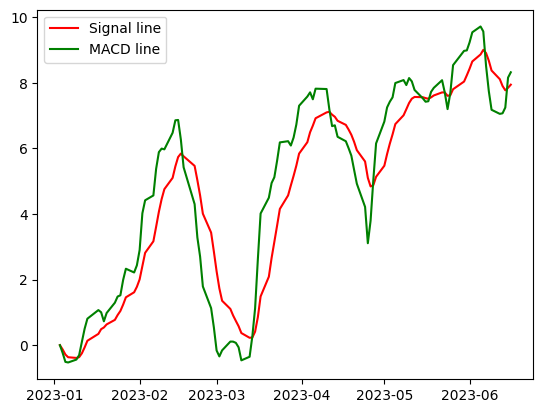

In [28]:
plt.plot(df.signal, label='Signal line', color='red')
plt.plot(df.MACD, label='MACD line', color='green')
plt.legend()
plt.show()

In [22]:
buy, sell = [], []

for i in range(2, len(df)):
    #IF MACD value in every single row(the reason iloc is used) is larger than the signal value of every single row 
    # and also MACD value is smaller than the signal value of the day before
    if df.MACD.iloc[i] > df.signal.iloc[i] and df.MACD.iloc[i-1] < df.signal.iloc[i-1]:
        buy.append(i)
    #reverse will be done for selling 
    elif df.MACD.iloc[i] < df.signal.iloc[i] and df.MACD.iloc[i-1] > df.signal.iloc[i-1]:
        sell.append(i)

In [23]:
buy # The below numbers are the row  numbers where these conditions are fulfilled

[5, 48, 79, 94, 99, 113]

In [24]:
sell

[32, 68, 91, 97, 107]

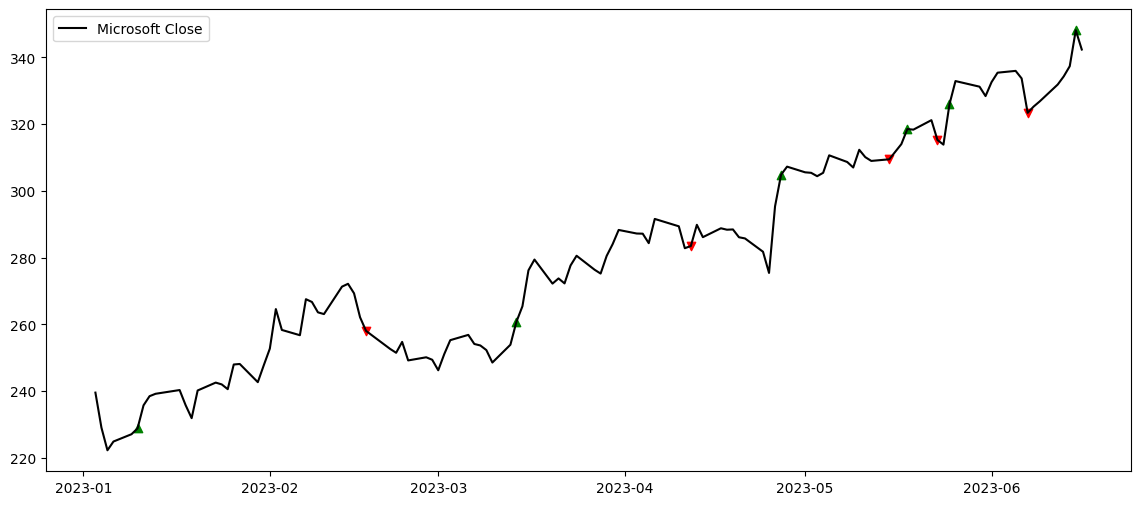

In [27]:
plt.figure(figsize=(14,6))
plt.scatter(df.iloc[buy].index, df.iloc[buy].Close, marker="^", color='green')
plt.scatter(df.iloc[sell].index, df.iloc[sell].Close, marker="v", color='red')
plt.plot(df.Close, label='Microsoft Close', color='k')
plt.legend()
plt.show()

In [29]:
buy

[5, 48, 79, 94, 99, 113]

In [30]:
#backtest

real_buys = [i+1 for i in buy] #row plus 1 value for every single buy value
real_sells = [i+1 for i in sell]

In [31]:
buy_prices = df.Open.iloc[real_buys] #screening the real prices for open buy dates
sell_prices = df.Open.iloc[real_sells]

In [32]:
buy_prices

Date
2023-01-11    231.289993
2023-03-15    259.980011
2023-04-28    304.010010
2023-05-19    316.739990
2023-05-26    324.019989
2023-06-16    351.320007
Name: Open, dtype: float64

In [43]:
# sometimes what will happen is you will have selling point(price) first but not buying point before it so we cannot calculate profit with it
# also it can happen that buying point will be in the end but no selling price after it to calculate profit
# So we have to those to cases 


if sell_prices.index[0] < buy_prices.index[0]:
    sell_prices = sell_prices.drop(sell_prices.index[0])
elif buy_prices.index[-1] > sell_prices.index[-1]:
    buy_prices = buy_prices.drop(buy_prices.index[-1])

In [44]:
relative_profits = []

for i in range(len(sell_prices)):
    relative_profits.append((sell_prices - buy_prices[i])/buy_prices[i])

In [45]:
relative_profits

[Date
 2023-02-21    0.100264
 2023-04-13    0.226123
 2023-05-16    0.339574
 2023-05-24    0.360759
 2023-06-08    0.400579
 Name: Open, dtype: float64,
 Date
 2023-02-21   -0.021156
 2023-04-13    0.090815
 2023-05-16    0.191745
 2023-05-24    0.210593
 2023-06-08    0.246019
 Name: Open, dtype: float64,
 Date
 2023-02-21   -0.162922
 2023-04-13   -0.067169
 2023-05-16    0.019144
 2023-05-24    0.035262
 2023-06-08    0.065557
 Name: Open, dtype: float64,
 Date
 2023-02-21   -0.196565
 2023-04-13   -0.104660
 2023-05-16   -0.021816
 2023-05-24   -0.006346
 2023-06-08    0.022732
 Name: Open, dtype: float64,
 Date
 2023-02-21   -0.214616
 2023-04-13   -0.124776
 2023-05-16   -0.043794
 2023-05-24   -0.028671
 2023-06-08   -0.000247
 Name: Open, dtype: float64]

In [46]:
# Average Profits

sum(relative_profits)/len(relative_profits)

Date
2023-02-21   -0.098999
2023-04-13    0.004067
2023-05-16    0.096971
2023-05-24    0.114320
2023-06-08    0.146928
Name: Open, dtype: float64

In [48]:
pd.DataFrame(relative_profits).mean()

Date
2023-02-21   -0.098999
2023-04-13    0.004067
2023-05-16    0.096971
2023-05-24    0.114320
2023-06-08    0.146928
dtype: float64